## Project 2 :    Ames Housing Data and Kaggle Challenge

## 01.   EDA and Cleaning

####  Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler\

%matplotlib inline



**Load the data**

In [2]:
train = pd.read_csv('../datasets/train.csv')   #read the train data
test  = pd.read_csv('../datasets/test.csv')    #read the test data

In [3]:
#check the first 5 rows
train.head()  

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [14]:
train.shape

9822

**Check datatypes**

In [4]:
train.info()      #check the info and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
print(train.shape)
print(test.shape)

(2051, 81)
(878, 80)


**Format the columns**

In [6]:
#check the columns
train.columns
test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
train.columns = train.columns.str.lower().str.replace(' ','_').str.replace('/','_')
test.columns = test.columns.str.lower().str.replace(' ','_').str.replace('/','_')

In [8]:
#check the columns
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

**Missing values in train data**


**For train**

In [9]:
#check for missing values
nulls = train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending = True)
nulls

total_bsmt_sf        1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
bsmt_full_bath       2
bsmt_half_bath       2
mas_vnr_area        22
mas_vnr_type        22
bsmtfin_type_1      55
bsmt_qual           55
bsmt_cond           55
bsmtfin_type_2      56
bsmt_exposure       58
garage_type        113
garage_finish      114
garage_qual        114
garage_cond        114
garage_yr_blt      114
lot_frontage       330
fireplace_qu      1000
fence             1651
alley             1911
misc_feature      1986
pool_qc           2042
dtype: int64

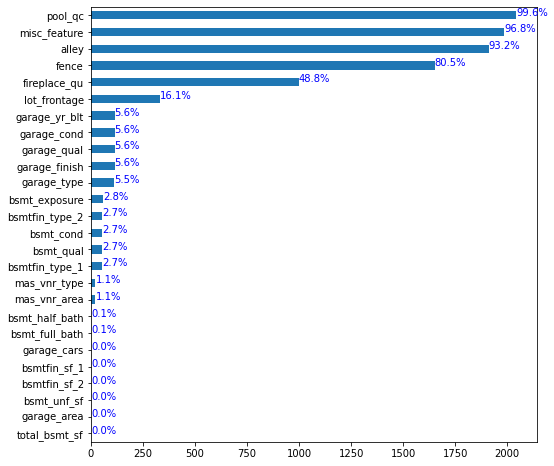

In [10]:
nulls.plot(kind = 'barh', figsize = (8,8))
for x,y in enumerate(nulls):
    plt.annotate(str(round(((y/2051)*100), 1)) + '%',  xy = (y,x), color = 'b', size =10)

**Clean the train data**

In [11]:
train.columns[train.isnull().sum()> 112].tolist()

['lot_frontage',
 'alley',
 'fireplace_qu',
 'garage_type',
 'garage_yr_blt',
 'garage_finish',
 'garage_qual',
 'garage_cond',
 'pool_qc',
 'fence',
 'misc_feature']

In [12]:
#Drop the columns with many missing values and replace 0 with the N/A
train = train.drop(columns = ['lot_frontage', 'garage_yr_blt'])

In [13]:
#check the remaining nulls
train.isnull().sum().sort_values(ascending = False)

pool_qc         2042
misc_feature    1986
alley           1911
fence           1651
fireplace_qu    1000
                ... 
1st_flr_sf         0
electrical         0
central_air        0
heating_qc         0
id                 0
Length: 79, dtype: int64

In [14]:
null_cols = train.columns[train.isnull().sum()>0].tolist()

In [15]:
for i in null_cols:
    if i in train.select_dtypes(exclude = 'object').columns:
        train.fillna(train[i].mean(), inplace = True) # replace the missing values with mean

In [16]:
#train.fillna(0, inplace = True)

In [17]:
# confirm no missing values
train.isnull().sum().sum()

0

In [18]:
train.shape

(2051, 79)

**Check the test data**

In [19]:
test.head(2) #check the first rows

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [20]:
test.shape

(878, 80)

In [21]:
#Drop the columns with many missing values and replace 0 with the N/A
test = test.drop(columns = ['lot_frontage', 'garage_yr_blt'])

In [22]:
null_test = test.columns[test.isnull().sum()>0].tolist()

In [23]:
for i in null_test:
    if i in test.select_dtypes(exclude = 'object').columns:
        train.fillna(test[i].mean(), inplace = True) 

In [24]:
# fill the categorical nulls with 0
test.fillna(0, inplace = True) 

In [25]:
#check for columns in train but not in test
for i in train.columns:
    if i not in test.columns:
        print(i)

saleprice


**EDA plots**

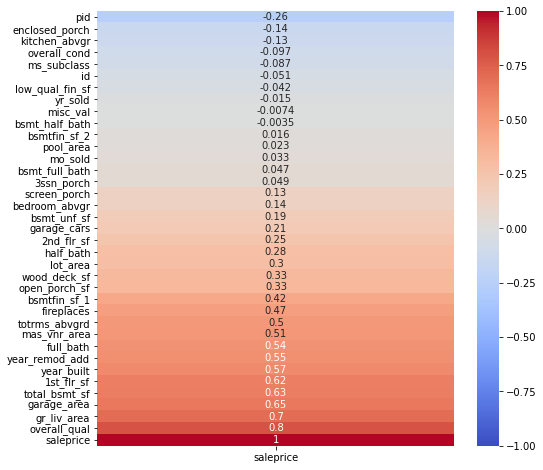

In [26]:
#create a heatmap to see the correlation of the variables to the target
plt.figure(figsize = (8,8))

sns.heatmap(train.corr()[['saleprice']].sort_values('saleprice'),
            annot = True,
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1);

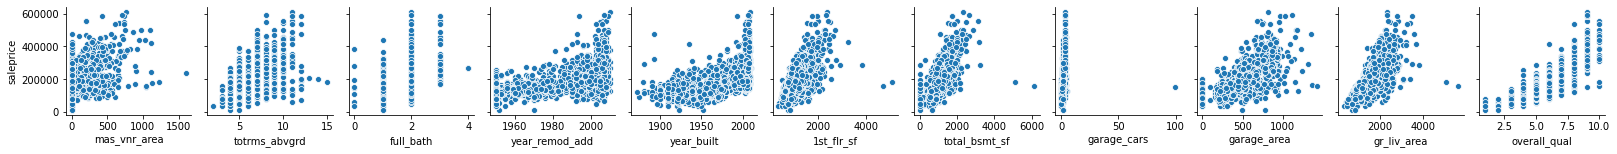

In [27]:
#create a pairplot for the most correlated features\
xvars = ['mas_vnr_area','totrms_abvgrd','full_bath','year_remod_add','year_built','1st_flr_sf',
        'total_bsmt_sf','garage_cars','garage_area','gr_liv_area','overall_qual']
sns.pairplot(train, x_vars = xvars, y_vars = ['saleprice'], height = 2);


**Train data distribution**

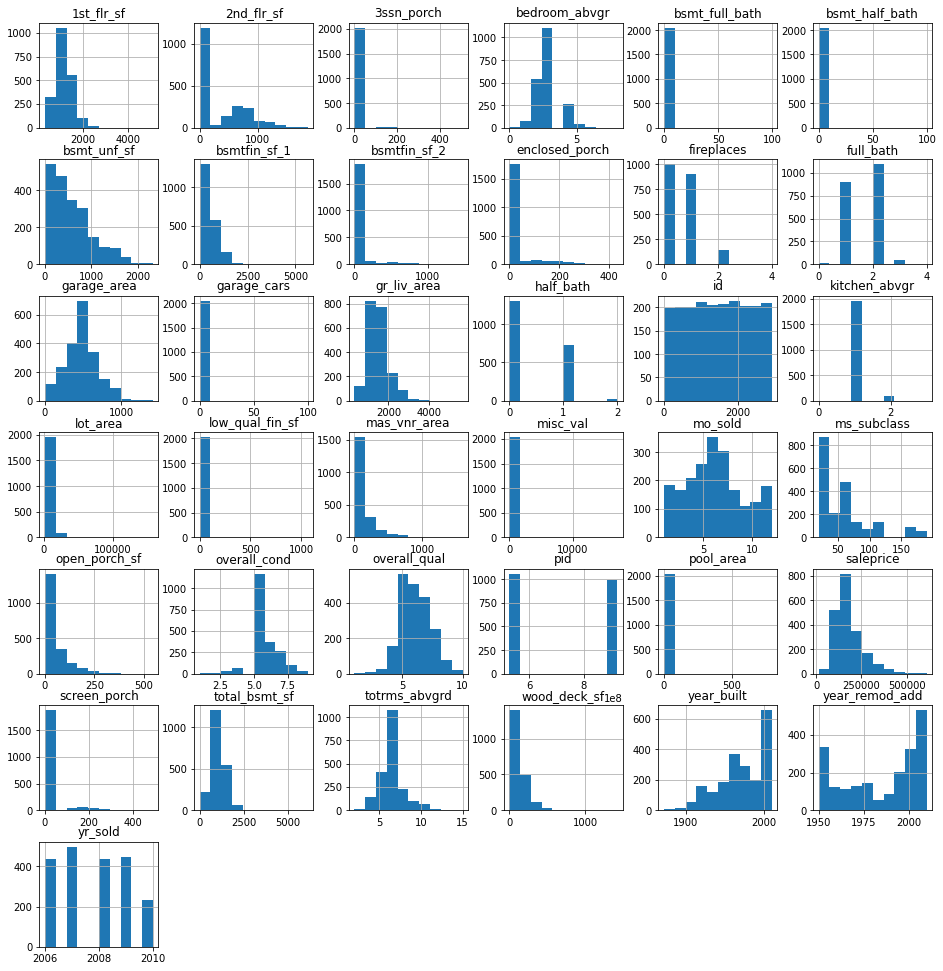

In [28]:
#lets check for the distribution of numeric features 
train.hist(figsize = (16,17));

**Outliers in train**

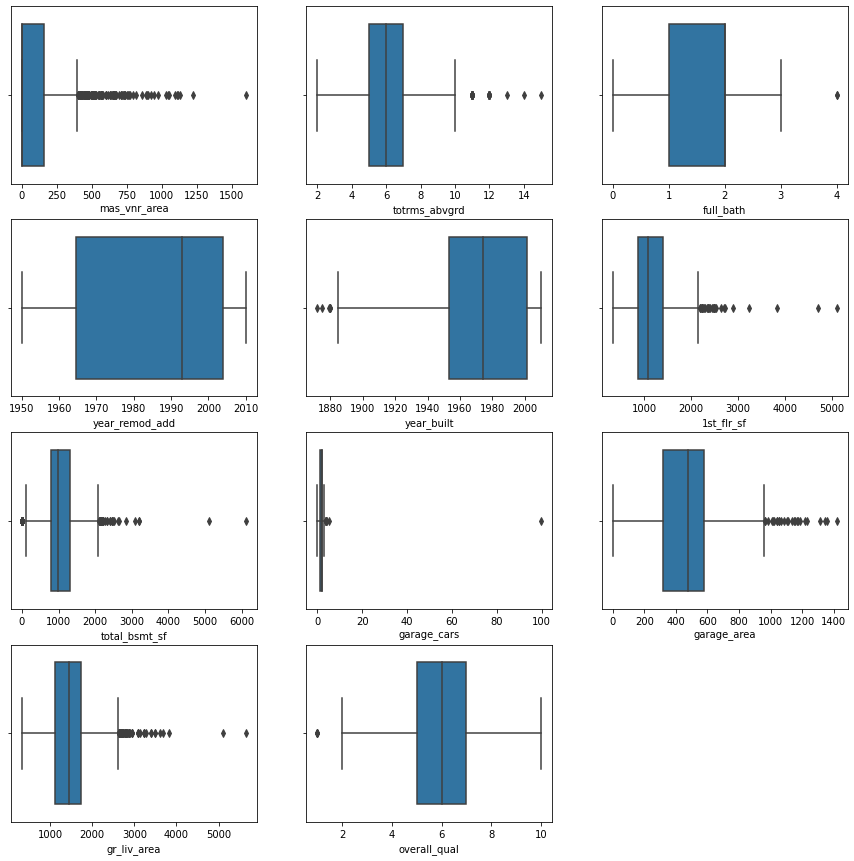

In [29]:
plt.figure(figsize = (15, 15))
for i in range(len(xvars)):
    plt.subplot(4,3,i+1)
    sns.boxplot(train[xvars[i]]);

In [30]:
#check for outliers in sale price

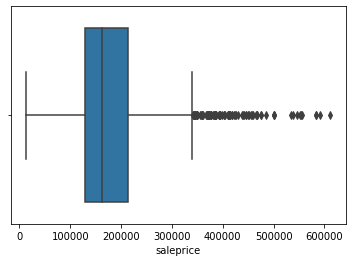

In [31]:
sns.boxplot(train['saleprice'])

In [32]:
train.shape

(2051, 79)

In [33]:
test.shape

(878, 78)

In [34]:
test.isnull().sum().sum()

0

In [35]:
train.isnull().sum().sum()

0

In [36]:
%store train

Stored 'train' (DataFrame)


In [37]:
%store test

Stored 'test' (DataFrame)
